In [21]:
!rm -Rf ~/.cache/rootpy pax_*
import os, sys
import numpy as np
from multihist import Histdd, Hist1d
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from scipy.optimize import curve_fit, minimize
pd.options.mode.chained_assignment = None        # default='warn'
import warnings
warnings.filterwarnings('ignore')

# -------------------- Make empyty dataframes w/ right cols to fill with data

rn_samp = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_rn_event_combine_v1/170313_2018.pkl')
ambe_samp = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ambe_event_combine_v1/170316_0834.pkl')

rn = pd.DataFrame(columns = list(rn_samp))
ambe = pd.DataFrame(columns = list(ambe_samp))

# ------------------- Import it ALL into one dataframe

for filename in os.listdir('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_rn_event_combine_v1/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_rn_event_combine_v1/' + str(filename))
    rn = rn.append(df)

for filename in os.listdir('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ambe_event_combine_v1/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ambe_event_combine_v1/' + str(filename))
    ambe = ambe.append(df)
    
ambe = ambe[ambe.s2>200]

In [8]:
# ------------------- The linear cut used in s2 - other largest s2 space for SS

def ses2_size_cut_ori(s2_area):
    linear_0 = s2_area * 0.00832 + 72.3
    linear_1 = s2_area * 0.03 - 109
    fermi_dirac_coef_0 = 1 / (np.exp((s2_area - 23300) * 5.91e-4) + 1)
    fermi_dirac_coef_1 = 1 / (np.exp((23300 - s2_area) * 5.91e-4) + 1)
    return linear_0*fermi_dirac_coef_0+linear_1*fermi_dirac_coef_1

In [9]:
cut_ambe = ambe[ambe.s2_1_area < ses2_size_cut_ori(ambe.s2)]

In [6]:
# building the csv instruct file from AmBe data
want = ['x','y','z','cs1','cs2']
a = cut_ambe[want]
a['z'] = -1 * a['z']
a['cs1'] = a['cs1'] / .12
a = a.dropna()

# simulator takes s2 electrons to determine s2
pe_per_e = 25
a['cs2'] = a['cs2'] / pe_per_e

# a.to_csv('~/data/nr_ss_sim/nrsim_from_ambe_help.csv')

#Then simulate w fax

/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1]:
# Load in sim data
import hax

# using modified version of Tianyu's OtherLargeS2s peak extractor
from make_minitree import Peaks

hax.init(experiment='XENON1T',
         use_runs_db=False,
         pax_version_policy='loose',
         main_data_paths=['~/data/nr_ss_sim/nrsim_from_ambe_v_4'],
         minitree_paths = ['~/data/nr_ss_sim/nrsim_from_ambe_v_4'])

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


In [2]:
sim = hax.minitrees.load("nrsim_from_ambe_drift_corrected",[Peaks])

DEBUG:hax.minitrees] Minitree nrsim_from_ambe_drift_corrected_Peaks.root not found
DEBUG:hax.minitrees] Not found in non-preferred formats either. Minitree will be created.


Could not find run number for nrsim_from_ambe_drift_corrected, got exception <class 'AttributeError'>: 'NoneType' object has no attribute 'query'. Setting run number to 0.
Don't know a run named nrsim_from_ambe_drift_corrected, trying to find it anyway...


INFO:ROOT.TUnixSystem.ACLiC] creating shared library /home/shawaf/xenon1t/single_scatter/pax_event_class-c783242b74eb71b58bd6fc7d895c5615_cpp.so
INFO:rootpy.stl] generating dictionary for std::vector<Hit> ...
INFO:ROOT.TUnixSystem.ACLiC] creating shared library /home/shawaf/.cache/rootpy/x86_64-60403/dicts/82d87afa59883353.so
INFO:rootpy.stl] generating dictionary for std::vector<Interaction> ...
INFO:ROOT.TUnixSystem.ACLiC] creating shared library /home/shawaf/.cache/rootpy/x86_64-60403/dicts/cdec148bac9cbdd6.so
INFO:rootpy.stl] generating dictionary for std::vector<ConfidenceTuple> ...
INFO:ROOT.TUnixSystem.ACLiC] creating shared library /home/shawaf/.cache/rootpy/x86_64-60403/dicts/2871972bd4758dd4.so
INFO:rootpy.stl] generating dictionary for std::vector<ReconstructedPosition> ...
INFO:ROOT.TUnixSystem.ACLiC] creating shared library /home/shawaf/.cache/rootpy/x86_64-60403/dicts/61ba32c8abdfd18e.so
INFO:rootpy.stl] generating dictionary for std::vector<Peak> ...
INFO:ROOT.TUnixSyste

Don't know a run named nrsim_from_ambe_drift_corrected, trying to find it anyway...


DEBUG:hax.minitrees] Found minitree at /home/shawaf/data/nr_ss_sim/nrsim_from_ambe_v_4/nrsim_from_ambe_drift_corrected_Peaks.root
DEBUG:hax.minitrees] Removing weird index column


In [6]:
# dropping poor events
sim = sim.dropna(subset = ['x','y','s2'])

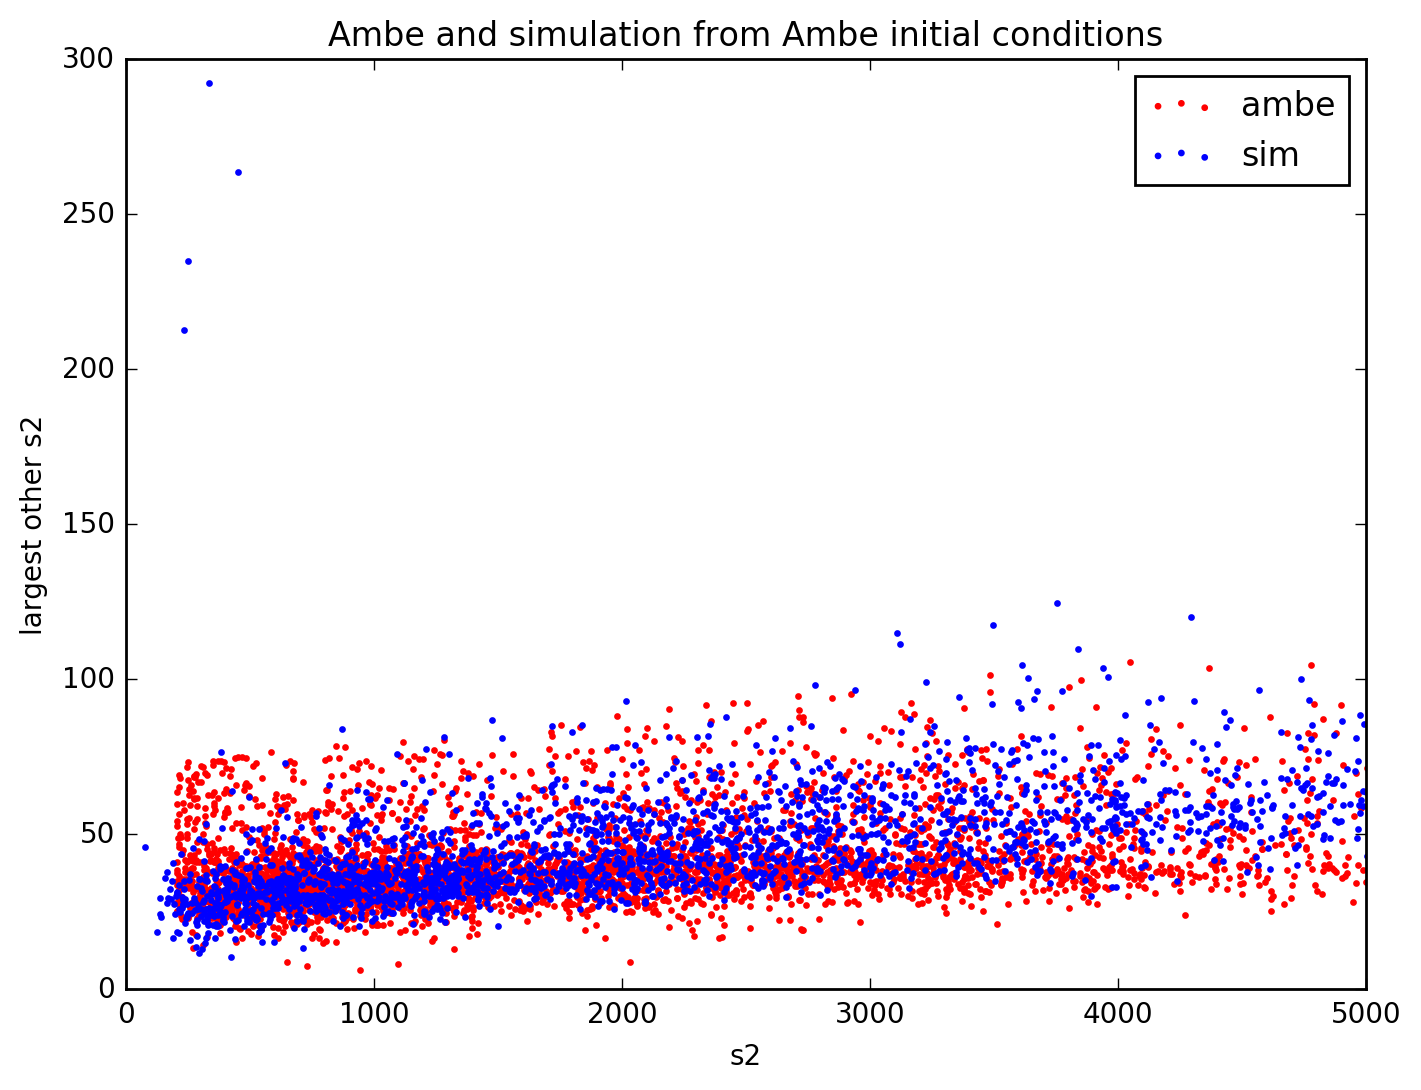

In [86]:
plt.figure(figsize = (8,6))
plt.scatter(cut_ambe.s2, cut_ambe.s2_1_area,label='ambe', color='r',s = 2)
plt.scatter(sim.s2, sim.s2_1_area, label='sim', color = 'b', s = 2)
plt.xlim(0,5000)
plt.ylim(0,300)
plt.title('Ambe and simulation from Ambe initial conditions')
plt.xlabel('s2')
plt.ylabel('largest other s2')

plt.legend(loc = 'upper right')
plt.show()

In [14]:
# What's that, the outliers in sim with large other s2
whats_that = sim[sim.s2_1_area >200]
whats_that

,cs1,cs2,event_number,goodness_of_fit,run_number,s1,s2,s2_1_area,s2_1_delay_is2,s2_1_goodness_of_fit,...,s2_5_goodness_of_fit,s2_5_range_50p_area,s2_5_x,s2_5_y,s2_5_z,s2_delay_is2,s2_range_50p_area,x,y,z
971,13.036266,908.858509,971,146.121170,0,14.177604,334.768097,292.341187,-1925.0000,174.184326,...,31.394320,144.772664,24.064537,40.772556,-151.70400,466622.75000,746.937973,24.214737,20.725740,-66.96144
1059,12.643261,680.783981,1059,159.921204,0,13.364077,251.561356,234.882172,-2039.8750,144.618149,...,NaN,NaN,NaN,NaN,NaN,453747.18750,378.151412,28.969992,22.732468,-65.09376
1107,12.829767,1227.140082,1107,170.251938,0,14.208500,391.022919,387.801392,-1899.1875,141.596664,...,43.593693,221.381535,-20.323935,26.807644,-101.20176,506424.81250,574.284509,40.622841,12.493674,-72.69120
1387,6.082770,692.963882,1387,118.256859,0,6.485183,234.542038,212.508530,2347.9375,90.592857,...,NaN,NaN,NaN,NaN,NaN,455377.65625,618.662170,-12.847133,31.416172,-65.36016
1421,2.429579,1088.496138,1421,217.658783,0,2.401925,568.563904,363.668945,-2248.0625,167.420135,...,37.428230,194.588248,-13.341478,-22.318922,-63.58752,328486.40625,781.577526,21.656166,-15.417218,-47.01600
1597,18.824510,1632.932409,1597,134.138992,0,22.100431,452.958191,263.681458,-2782.0000,124.210258,...,55.731499,272.598460,8.104636,28.054512,-86.84928,578204.87500,801.231499,38.197884,9.965568,-82.99440
1678,7.970680,767.110573,1678,169.232697,0,7.644385,407.703888,341.289978,-2280.3125,146.181625,...,34.807148,284.701786,24.812656,-13.092105,-106.13952,309463.46875,847.584558,23.069675,0.124687,-44.29296


![title](outlier_evnt_971_sim.png)

![title](outlier_evnt_1059_sim.png)

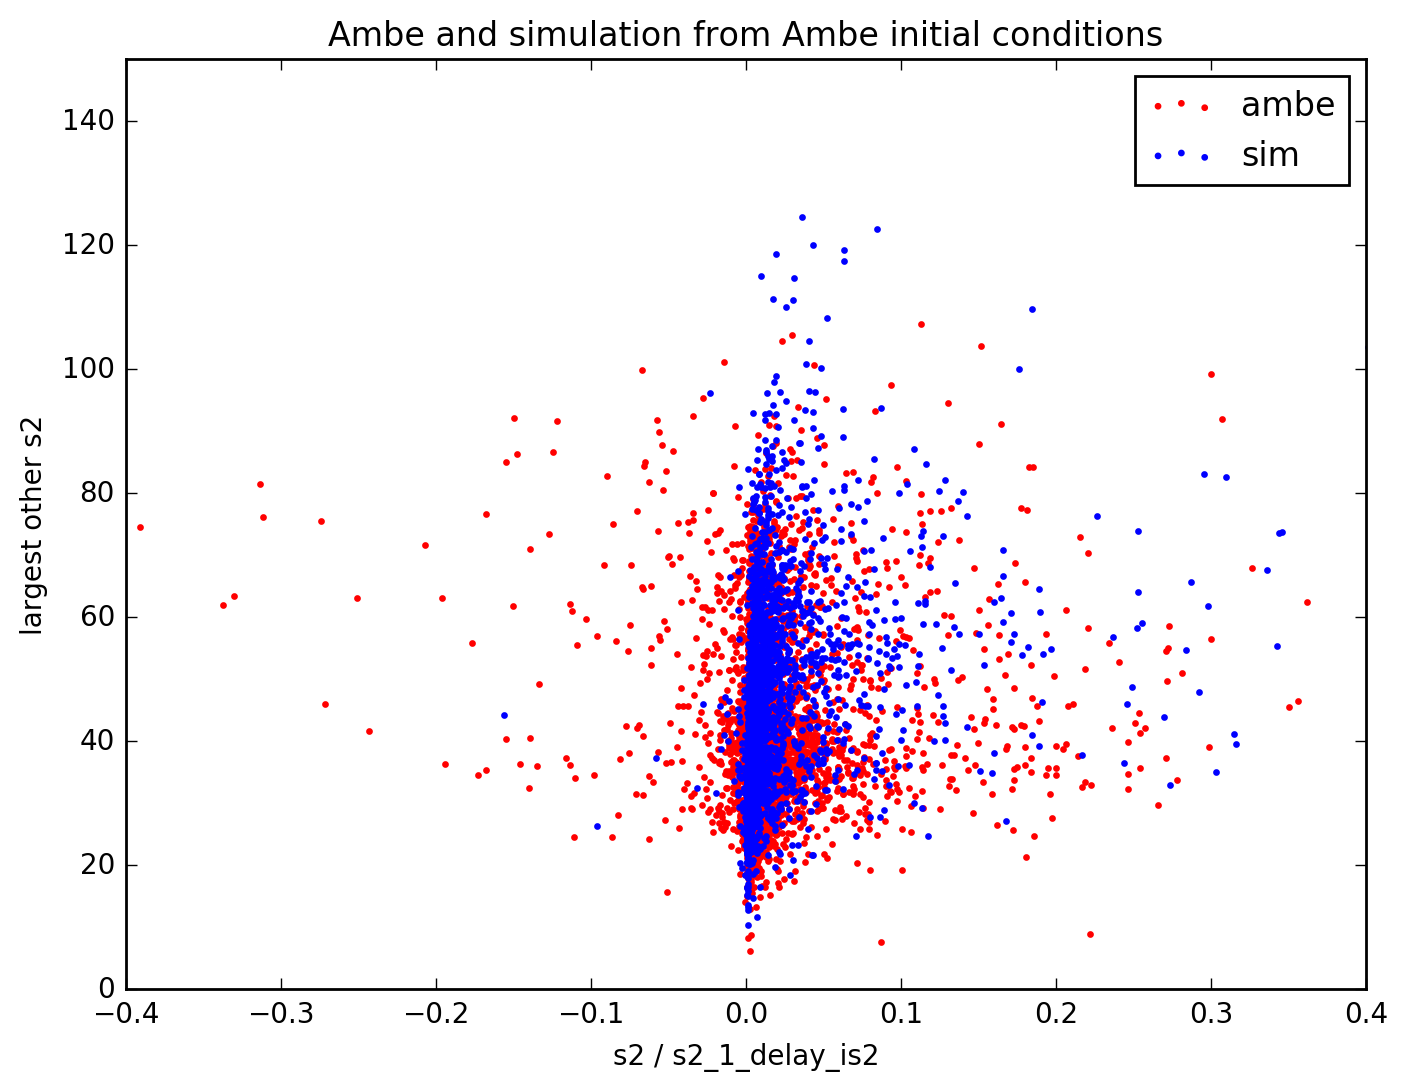

In [90]:
plt.figure(figsize = (8,6))
plt.scatter(cut_ambe.s2 / cut_ambe.s2_1_delay_is2, cut_ambe.s2_1_area,label='ambe', color='r',s = 2)
plt.scatter(sim.s2 / sim.s2_1_delay_is2, sim.s2_1_area, label='sim', color = 'b', s = 2)

plt.xlim(-.4,.4)
plt.ylim(0,150)

plt.title('Ambe and simulation from Ambe initial conditions')
plt.xlabel('s2 / s2_1_delay_is2')
plt.ylabel('largest other s2')

plt.legend(loc = 'upper right')
plt.show()

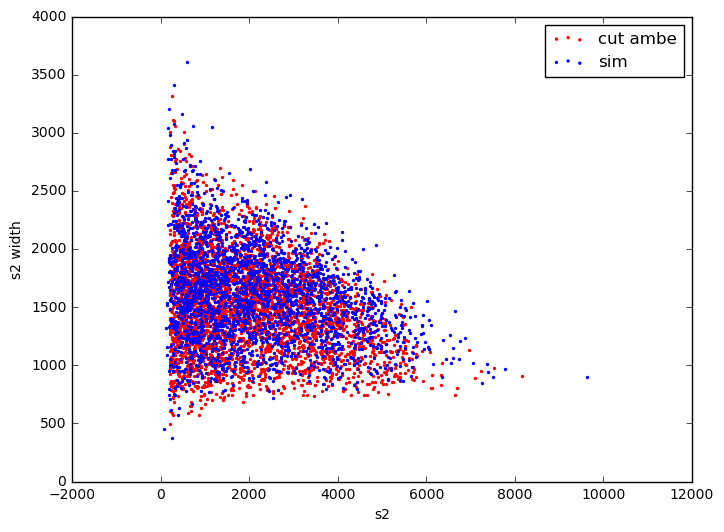

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(cut_ambe.s2, cut_ambe.s2_range_50p_area,label='cut ambe', color='r',s = 2)
plt.scatter(sim.s2, sim.s2_range_50p_area,label='sim',color = 'b',s = 2)

plt.xlabel('s2')
plt.ylabel('s2 width')

plt.legend(loc = 'upper right')
plt.show()

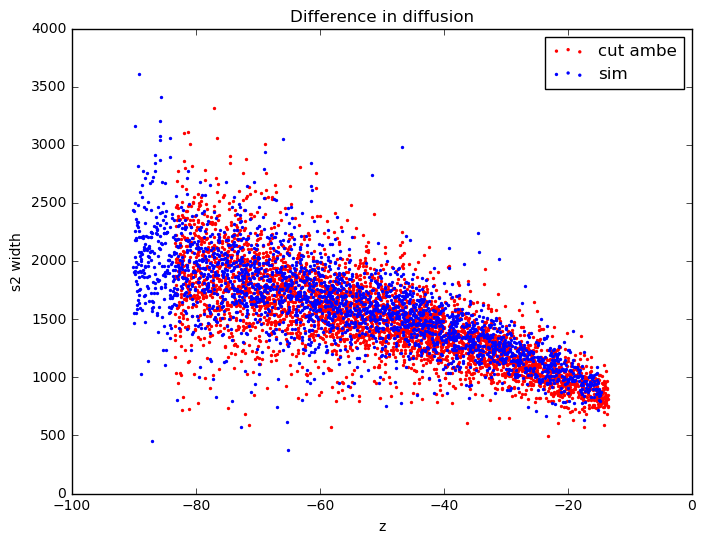

In [12]:
plt.figure(figsize = (8,6))
plt.scatter(cut_ambe.z, cut_ambe.s2_range_50p_area,label='cut ambe', color='r',s = 2)
plt.scatter(sim.z, sim.s2_range_50p_area,label='sim',color = 'b',s = 2)

plt.title('Difference in diffusion')
plt.xlabel('z')
plt.ylabel('s2 width')

plt.legend(loc = 'upper right')
plt.show()

Why is simulation displaced down in the detector? z is determined via the drift time and electron lifetime. is it offset?

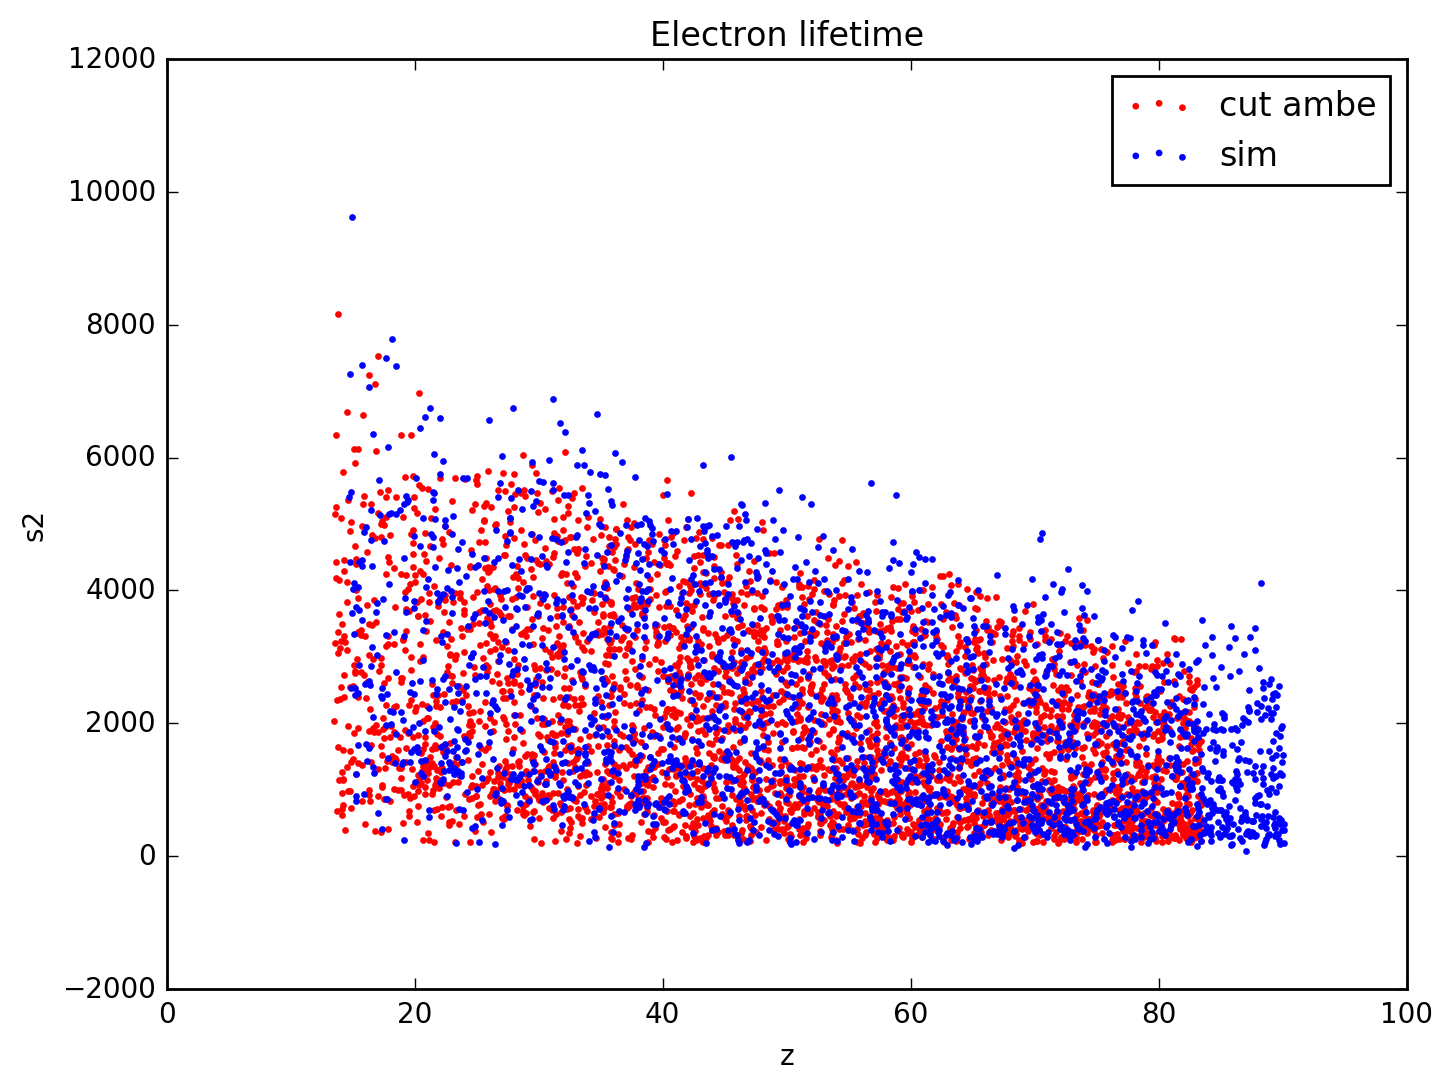

In [35]:
plt.figure(figsize = (8,6))
plt.scatter(-cut_ambe.z, cut_ambe.s2,label='cut ambe', color='r',s = 2)
plt.scatter(-sim.z, sim.s2,label='sim',color = 'b',s = 2)

plt.title('Electron lifetime')
plt.xlabel('z')
plt.ylabel('s2')

plt.legend(loc = 'upper right')
plt.show()

lifetime (ns):420.41488564244605
st. dev:0.0048369149669697797


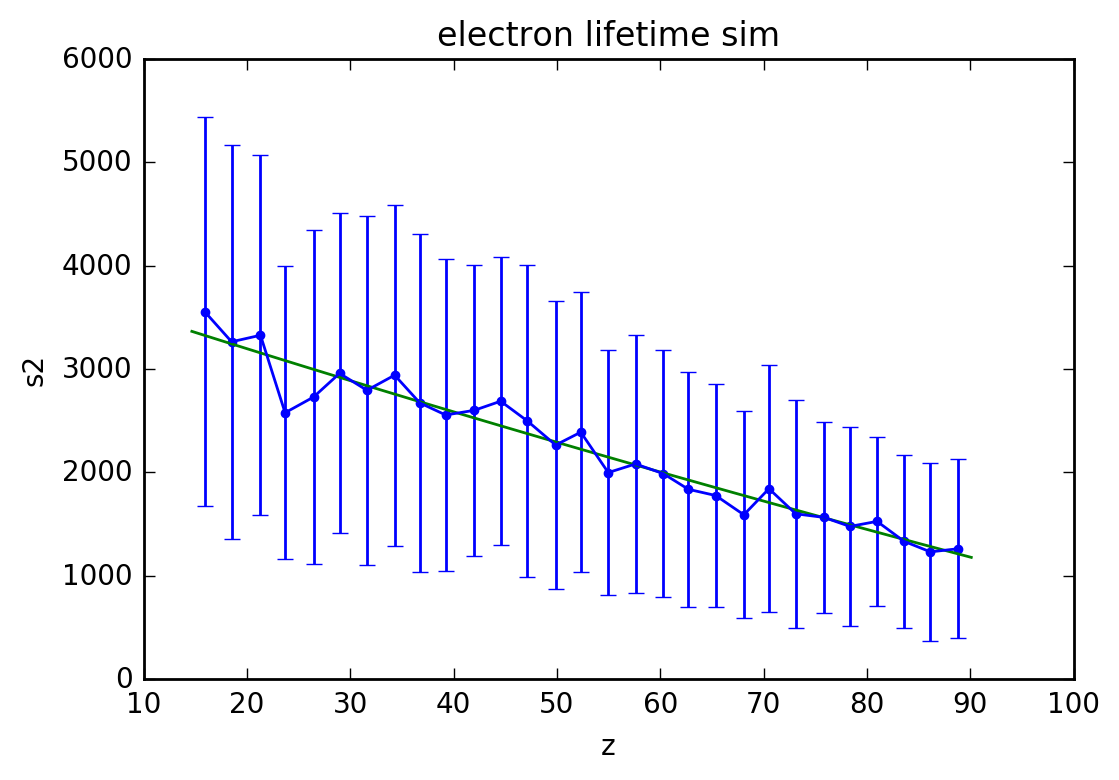

In [83]:
from scipy.optimize import curve_fit

def exp_func(x,a,b,c):
	return a*np.exp(-b*x)+c


##############################################
d1 = sim
d1.z = abs(d1.z)
minz = min(d1.z)
maxz = max(d1.z)

bins = np.linspace(minz, maxz, 30)

means2 = []
sigma = []
meanz = []

for i in range(len(bins)):
	a = d1.loc[(d1.z < bins[i]) & (d1.z > bins[i-1])]

	mn = np.mean(a.s2)
	sg = np.std(a.s2)
	mz = np.mean(a.z)

	if (np.logical_not(np.isnan(mn)) & np.logical_not(np.isnan(sg))):
		means2.append(mn)
		sigma.append(sg)
		meanz.append(mz)

ds = pd.DataFrame(np.array([meanz,means2,sigma]).T, index = range(len(means2)), columns = ['meanz','means2','sigma'])

popt, pcov = curve_fit(exp_func, ds.meanz, ds.means2, p0 = (5000,1e-4,50))

yy = exp_func(bins, *popt)

plt.plot(ds.meanz,ds.means2,'.',bins,yy,'-')

plt.errorbar(ds.meanz,ds.means2, yerr = ds.sigma,color='b')

plt.title('electron lifetime sim')
plt.xlabel('z')
plt.ylabel('s2')

print('lifetime (ns):' + repr(1/popt[1]))
print('st. dev:' + repr(np.sqrt(pcov[1,1])))

plt.show()

lifetime (ns):77105.59880421673
st. dev:0.0048795058667343467


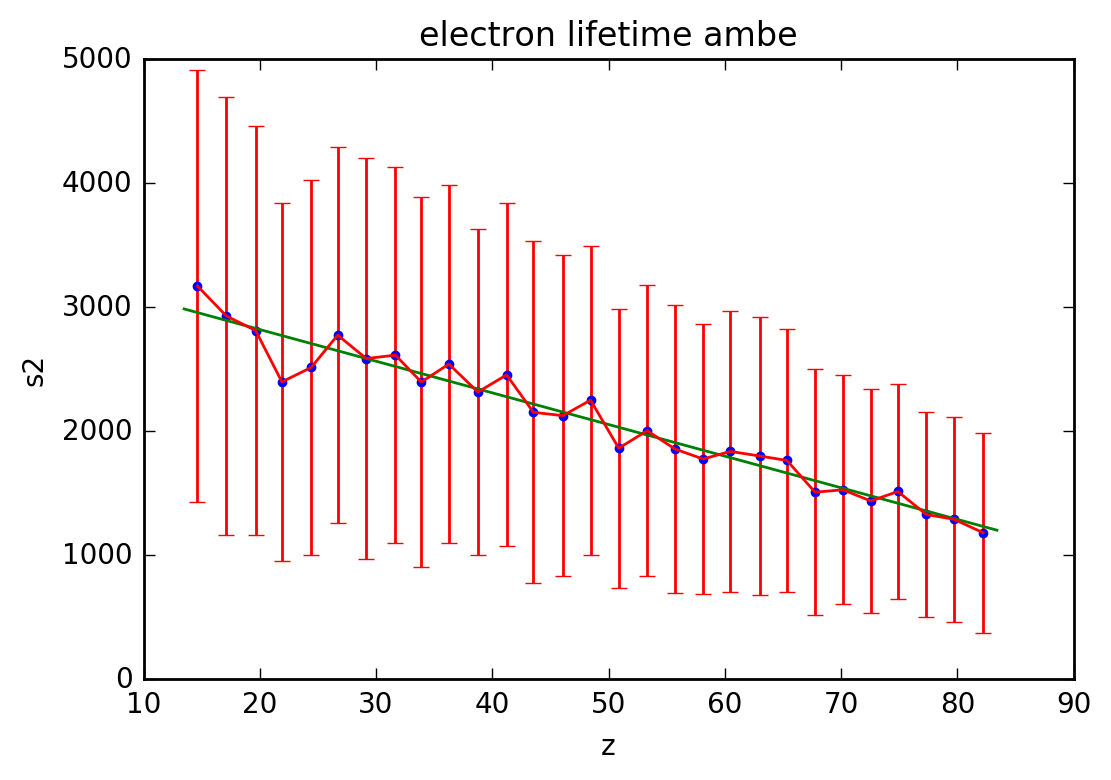

In [84]:
##############################################
d1 = cut_ambe
d1.z = abs(d1.z)
minz = min(d1.z)
maxz = max(d1.z)

bins = np.linspace(minz, maxz, 30)

means2 = []
sigma = []
meanz = []

for i in range(len(bins)):
	a = d1.loc[(d1.z < bins[i]) & (d1.z > bins[i-1])]

	mn = np.mean(a.s2)
	sg = np.std(a.s2)
	mz = np.mean(a.z)

	if (np.logical_not(np.isnan(mn)) & np.logical_not(np.isnan(sg))):
		means2.append(mn)
		sigma.append(sg)
		meanz.append(mz)

ds = pd.DataFrame(np.array([meanz,means2,sigma]).T, index = range(len(means2)), columns = ['meanz','means2','sigma'])

popt, pcov = curve_fit(exp_func, ds.meanz, ds.means2, p0 = (50000,1e-4,5))

yy = exp_func(bins, *popt)

plt.plot(ds.meanz,ds.means2,'.',bins,yy,'-')

plt.errorbar(ds.meanz,ds.means2, yerr = ds.sigma)

plt.title('electron lifetime ambe')
plt.xlabel('z')
plt.ylabel('s2')

print('lifetime (ns):' + repr(1/popt[1]))
print('st. dev:' + repr(np.sqrt(pcov[1,1])))

plt.show()

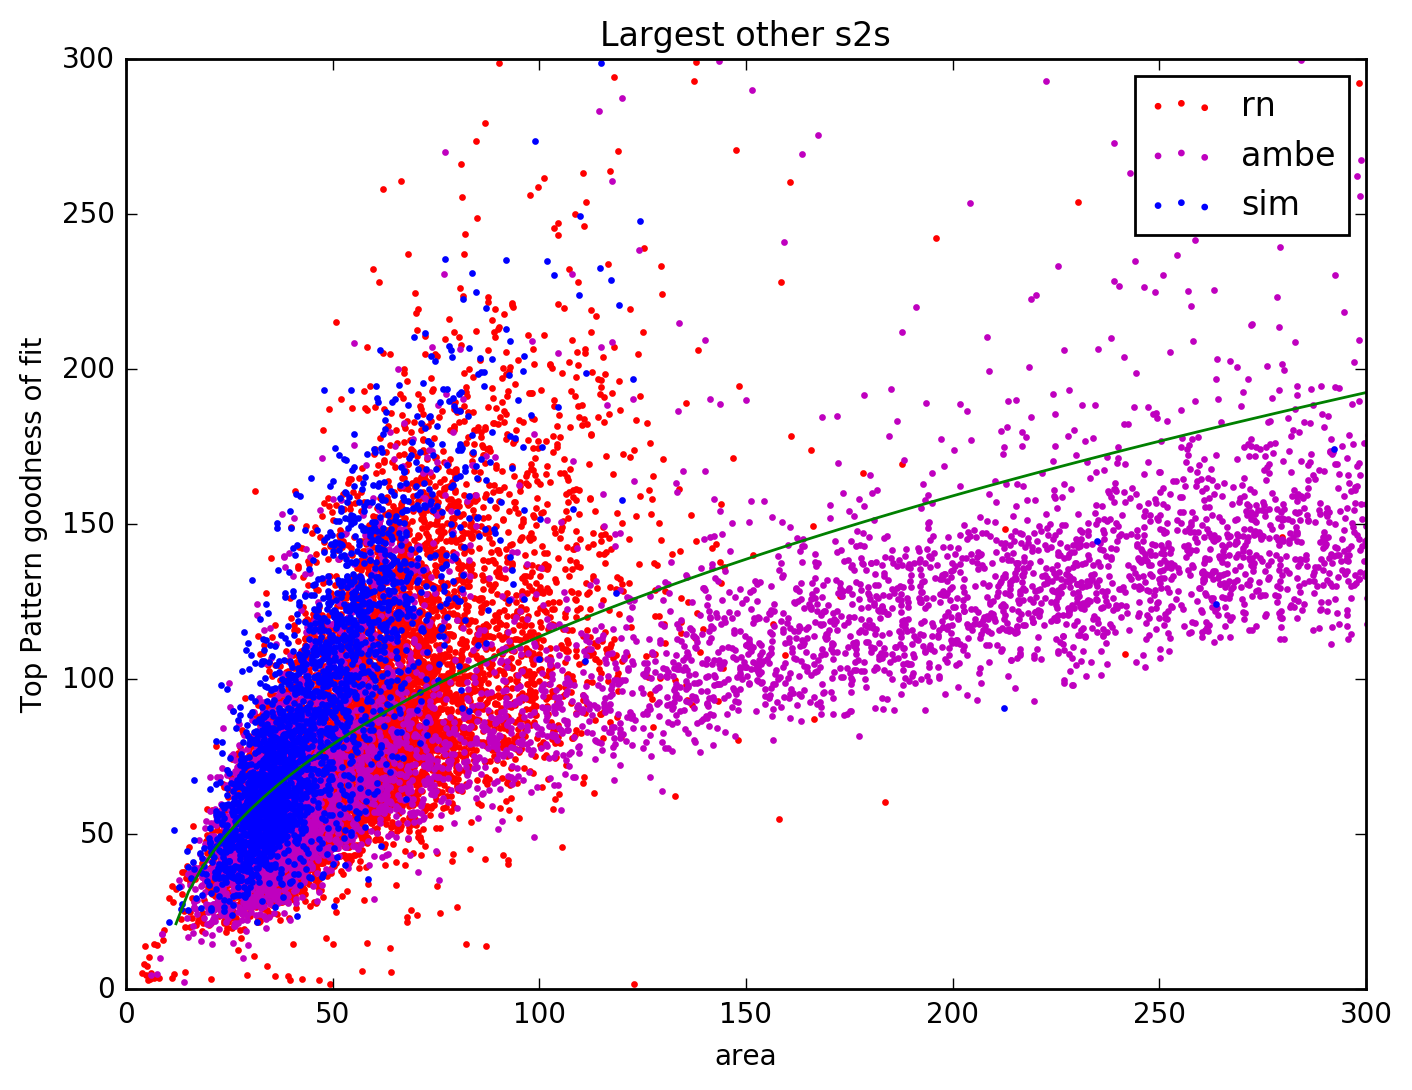

In [29]:
plt.figure(figsize = (8,6))
plt.scatter(rn.s2_1_area, rn.s2_1_goodness_of_fit,label='rn', color='r',s = 2)
plt.scatter(ambe.s2_1_area, ambe.s2_1_goodness_of_fit,label='ambe',color = 'm',s = 2)

plt.scatter(sim.s2_1_area, sim.s2_1_goodness_of_fit,label='sim',color = 'b',s = 2)
def area_cut(area):
    return 15*(area - 10)**.45

x = np.linspace(0,300,100)

plt.xlim(0,300)
plt.ylim(0,300)
plt.title('Largest other s2s')
plt.xlabel('area')
plt.ylabel('Top Pattern goodness of fit')

plt.plot(x, area_cut(x),color = 'g')

plt.legend(loc = 'upper right')
plt.show()